# Notebook 1: Exploratory Data Analysis - Features

After processing all necessary data, we would perform exploratory data analysis on different features obtained. 

* [EDA on positive samples](#eda_positive)
    * [Data and feature analysis](#positive_features)
    * [Heatmap analysis](#positive_heatmap)
* [EDA on negative samples](#eda_negative)
    * [Data and feature analysis](#negative_features)
    * [Heatmap analysis](#negative_heatmap)
* [EDA on all samples](#eda_all)
    * [Data and feature analysis](#all_features)
    * [Heatmap](#all_heatmap)
    * [Analysis of different features](#analysis_all)
    * [Normalizing features](#normalize)



### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\tiany\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def mean(x):
    return sum(x)/len(x)

# EDA on positive samples <a name = "eda_positive"> </a>

- [Data and feature analysis](#positive_features)
- [Heatmap](#positive_heatmap)

## Load positive data

In [3]:
df_positive_feature = pd.read_csv("positive_feature.csv")
df_positive_feature.head()

,title,tag,artist,year,views,features,lyrics,id,url,Number of days_x,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,url_clean
0,stronger,rap,kanye west,2007,1438598,{},"[Produced by Kanye West, Mike Dean, and Timbal...",525,https://open.spotify.com/track/6C7RJEIUDqKkJRZ...,7,...,0.00000,10,0.3180,-7.731,0,0.1550,103.980,0.483,0,6C7RJEIUDqKkJRZVWdkfkH
1,the real slim shady,rap,eminem,2000,2926565,{},"[Intro]\nMay I have your attention, please?\nM...",531,https://open.spotify.com/track/3yfqSUWxFvZELEM...,205,...,0.00000,5,0.0454,-4.244,0,0.0572,104.504,0.760,86,3yfqSUWxFvZELEM4PmlwIR
2,paris morton music,rap,drake,2010,473576,{},"[Chorus]\nWould've came back for you, I just n...",776,https://open.spotify.com/track/73IE87H0g2MBmdn...,1,...,0.00008,10,0.1050,-8.635,0,0.3150,171.978,0.141,55,73IE87H0g2MBmdn41lkVto
3,without me,rap,eminem,2002,3212844,{},"[Intro: Obie Trice]\nObie Trice, real name, no...",811,https://open.spotify.com/track/7lQ8MOhq6IN2w8E...,86,...,0.00000,7,0.2370,-2.827,1,0.0738,112.238,0.662,86,7lQ8MOhq6IN2w8EYcFNSUk
4,keep ya head up,rap,2pac,1993,1712247,{},[Intro: 2Pac]\nLittle something for my godson ...,826,https://open.spotify.com/track/0XRbYXQUymj9SJk...,1,...,0.00000,4,0.5080,-7.013,1,0.4250,172.329,0.595,70,0XRbYXQUymj9SJkrr8YK5B


## data and feature analysis <a name = "positive_features"> </a>

In [105]:
df_positive_feature.isnull().sum()

title               0
tag                 0
artist              0
year                0
views               0
features            0
lyrics              0
id                  0
url                 0
Number of days_x    0
Year                0
chart               0
region              0
Number of days_y    0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
popularity          0
url_clean           0
dtype: int64

We check that there is no null data so we do not have to deal with any missing values.

In [170]:
positive_eda = pd.DataFrame(df_positive_feature[['acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'popularity', 'Number of days_x','views', 'tag']])
positive_eda

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,Number of days_x,views,tag
0,0.007280,0.625,311867,0.726,0.000000,10,0.3180,-7.731,0,0.1550,103.980,0.483,0,7,1438598,rap
1,0.030200,0.949,284200,0.661,0.000000,5,0.0454,-4.244,0,0.0572,104.504,0.760,86,205,2926565,rap
2,0.414000,0.505,251240,0.494,0.000080,10,0.1050,-8.635,0,0.3150,171.978,0.141,55,1,473576,rap
3,0.002860,0.908,290320,0.669,0.000000,7,0.2370,-2.827,1,0.0738,112.238,0.662,86,86,3212844,rap
4,0.144000,0.598,262507,0.732,0.000000,4,0.5080,-7.013,1,0.4250,172.329,0.595,70,1,1712247,rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,0.359000,0.807,223961,0.773,0.002170,5,0.3030,-6.885,0,0.2780,139.816,0.867,57,8,221,pop
4763,0.000093,0.533,214280,0.932,0.000787,8,0.0991,-7.274,1,0.0732,145.988,0.541,17,4,3,rock
4764,0.137000,0.707,197781,0.833,0.000000,3,0.1150,-2.498,1,0.0517,110.062,0.788,68,1,36,pop
4765,0.146000,0.615,171385,0.521,0.772000,2,0.1100,-9.488,1,0.0318,115.016,0.045,78,10,133,rap


In [168]:
positive_eda.describe()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,Number of days_x,views
count,4767.000000,4767.000000,4.767000e+03,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4.767000e+03
mean,0.245203,0.655598,2.090295e+05,0.628342,0.027918,5.222572,0.175382,-6.778648,0.596392,0.125441,122.172070,0.474893,37.380323,25.738200,2.534755e+05
std,0.259673,0.157244,5.860739e+04,0.183403,0.129183,3.631900,0.133585,2.856342,0.490672,0.121749,29.270504,0.225933,27.368276,77.058247,5.895420e+05
min,0.000004,0.072900,2.966800e+04,0.005430,0.000000,0.000000,0.023200,-34.475000,0.000000,0.022300,45.780000,0.026200,0.000000,1.000000,3.000000e+00
25%,0.038050,0.551000,1.769330e+05,0.512000,0.000000,2.000000,0.096600,-8.054500,0.000000,0.041300,98.598000,0.300000,0.000000,2.000000,2.693850e+04
50%,0.143000,0.670000,2.028350e+05,0.642000,0.000000,5.000000,0.123000,-6.299000,1.000000,0.069000,120.100000,0.465000,47.000000,6.000000,9.159300e+04
75%,0.386000,0.773000,2.329975e+05,0.764000,0.000157,8.000000,0.208500,-4.891500,1.000000,0.172000,141.536500,0.648000,60.000000,16.000000,2.448775e+05
max,0.994000,0.980000,1.355938e+06,0.998000,0.973000,11.000000,0.972000,0.017000,1.000000,0.954000,216.334000,0.974000,89.000000,1769.000000,1.757563e+07


### Plot continuous and non-binary data

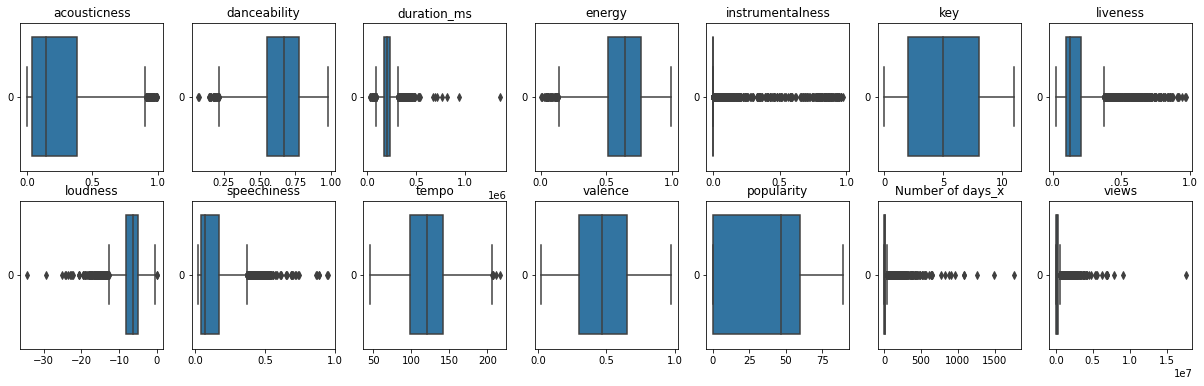

In [73]:
# Tag is a categorical variable while mode is a binary categorical variabel 
temp = positive_eda.copy()
temp = temp.drop(columns = ['mode', 'tag'])

fig, ax = plt.subplots(2, 7, figsize=(21, 6))
for i in range(0, 14):
    ax[i//7, i%7].set_title(temp.columns[i])
    sb.boxplot(temp.iloc[:,i], ax = ax[i//7, i%7], orient = 'h')

## Heatmap <a name = "positive_heatmap"> </a>

<Axes: >

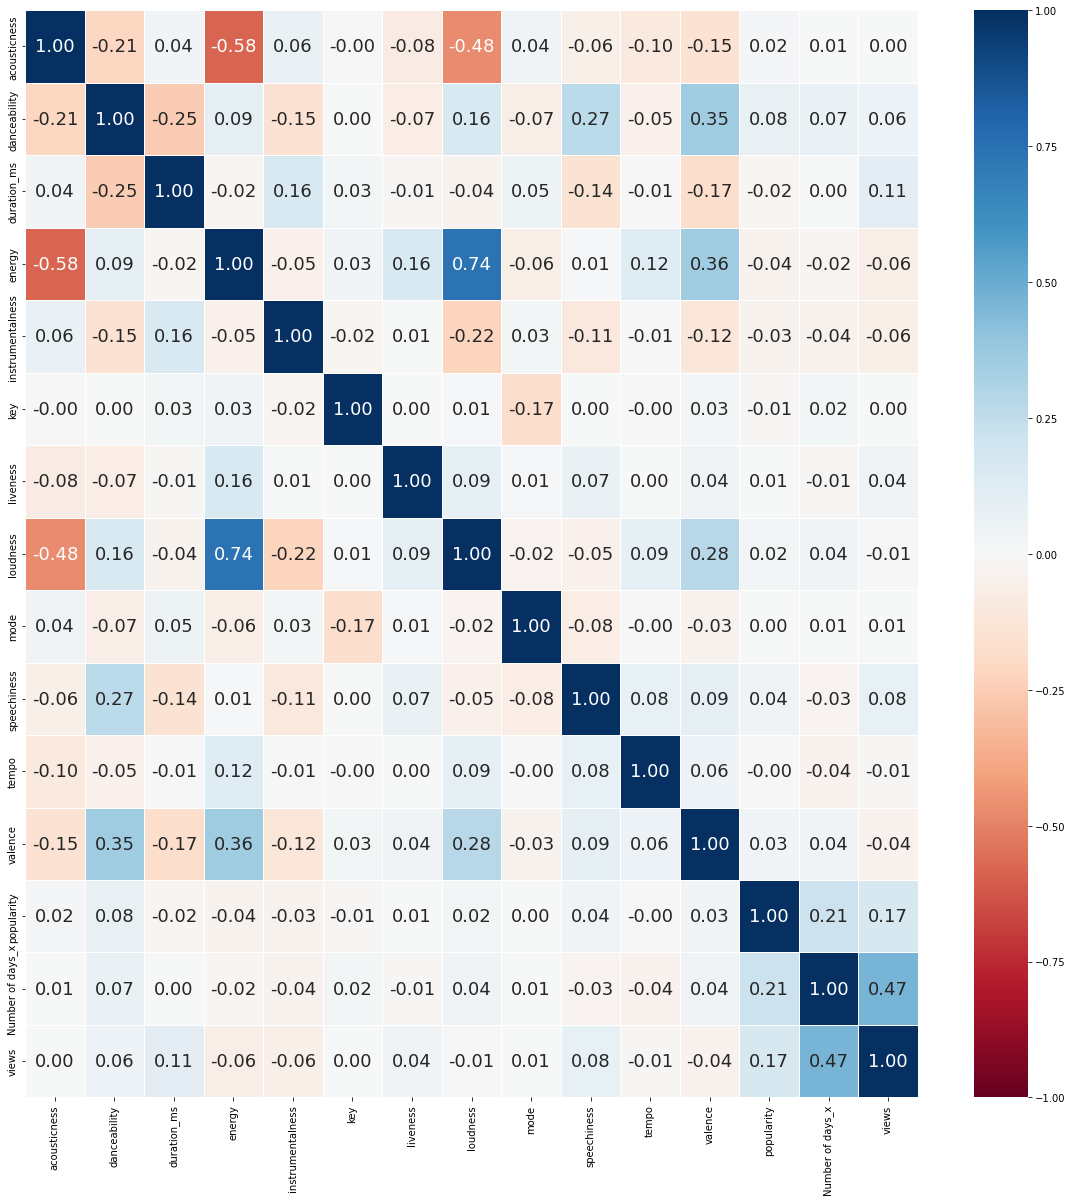

In [81]:
fig = plt.figure(figsize=(20, 20))
sb.heatmap(positive_eda.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Analysis

In respect to correlations of different features to popularity, we could see that most correlation lies between -0.05 to 0.05, which indicuate that there's almost no correlation between the respective features and popularity; 

While 'number of days' and 'views' has a correlation of 0.21 and 0.17 against popularity, which is not significant but better than the rest, it doesn't provide much insight to our goal. As it's reasonable for a popular song to be trending for more days or have higher views.

As for correlation between different features, again, we could see that most inter-feature correlation  lies between -0.05 to 0.05, which indicates that there might not be a linear relationship between features. 

Where are those pairs with relatively strong correlation such as energy vs loudness (0.74), energy vs acousticness (-0.58), loudness and acousticness (-0.48), could be explained by the nature of these features. For instance,  'loudness' as a perceptual feature that contribute to energy could explain their relatively strong positive correlation .
 

# EDA on negative sample <a name = "eda_negative"> </a>

- [Data and feature analysis](#negative_features)
- [Heatmap](#negative_heatmap)


## Load negative data

In [5]:
df_negative_feature = pd.read_csv("negative_feature.csv")
df_negative_feature.head()


,tag,artist,year,views,features,lyrics,id,url,acousticness,danceability,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,url_clean
0,pop,AKING,2015,779,{},Glorious mistakes are anxiously waiting to be ...,985583,https://open.spotify.com/track/30sr35axWFPOvmi...,0.7570,0.792,...,0.00037,4,0.3550,-10.913,1,0.0474,116.968,0.558,28,30sr35axWFPOvmijSfEfdM
1,rap,Filip Winther,2020,22,{},[Intro]\nDe-de-deluxe\n\n[Refräng]\nJag fuckar...,5097257,https://open.spotify.com/track/4mznGf6tTvHp74y...,0.0206,0.878,...,0.00000,11,0.0987,-8.588,0,0.3810,150.129,0.490,0,4mznGf6tTvHp74y0oPOgoD
2,pop,Dan Reeder,2018,266,{},The guy who bathes in the pond at the park\nTh...,3407076,https://open.spotify.com/track/1UbSSyqIVEkooKe...,0.9900,0.545,...,0.20600,5,0.1120,-18.390,1,0.0373,123.333,0.626,19,1UbSSyqIVEkooKeJTz8IgX
3,pop,Noa Azazel,2021,22,{},[Pre-Chorus]\nWhen the moon is taking over i'm...,7061926,https://open.spotify.com/track/51F8whLH1Qou7iV...,0.2140,0.412,...,0.00000,1,0.1120,-13.592,0,0.0588,138.429,0.176,1,51F8whLH1Qou7iVctzkaPF
4,rap,070 Phi,2019,357,{},[Chorus]\nAin't no way that you ain't eatin' w...,4241387,https://open.spotify.com/track/0mvzUwvyLT1Dm1y...,0.3660,0.683,...,0.00000,0,0.1410,-9.448,0,0.2860,81.371,0.697,10,0mvzUwvyLT1Dm1y2L5tniv


## data and feature analysis <a name = "negative_features"> </a>

In [106]:
df_negative_feature.isnull().sum()

tag                 0
artist              0
year                0
views               0
features            0
lyrics              0
id                  0
url                 0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
popularity          0
url_clean           0
dtype: int64

We check that there is no null data so we do not have to deal with any missing values.

In [179]:
negative_eda =  pd.DataFrame(df_negative_feature[['acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'popularity', 'views', 'tag']])
negative_eda.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,views,tag
0,0.7570,0.792,200453,0.5300,0.00037,4,0.3550,-10.913,1,0.0474,116.968,0.558,28,779,pop
1,0.0206,0.878,197250,0.6960,0.00000,11,0.0987,-8.588,0,0.3810,150.129,0.490,0,22,rap
2,0.9900,0.545,65780,0.0899,0.20600,5,0.1120,-18.390,1,0.0373,123.333,0.626,19,266,pop
3,0.2140,0.412,234167,0.3410,0.00000,1,0.1120,-13.592,0,0.0588,138.429,0.176,1,22,pop
4,0.3660,0.683,203941,0.6310,0.00000,0,0.1410,-9.448,0,0.2860,81.371,0.697,10,357,rap


In [68]:
negative_eda.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,views
count,4767.000000,4767.000000,4.767000e+03,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4767.000000,4.767000e+03
mean,0.295810,0.591644,2.048021e+05,0.599724,0.142107,5.249843,0.186118,-8.860173,0.594294,0.128435,121.797816,0.430834,12.554437,3.721784e+03
std,0.304800,0.182425,8.293258e+04,0.227131,0.295642,3.593001,0.150870,4.303049,0.491080,0.135958,29.952701,0.243533,14.798093,7.053710e+04
min,0.000001,0.000000,5.805000e+03,0.001480,0.000000,0.000000,0.000000,-45.372000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.029500,0.470000,1.594600e+05,0.447000,0.000000,2.000000,0.098600,-10.711000,0.000000,0.038900,97.509500,0.229000,0.000000,1.300000e+01
50%,0.184000,0.606000,1.975570e+05,0.614000,0.000030,5.000000,0.123000,-8.003000,1.000000,0.063400,120.152000,0.418000,6.000000,5.500000e+01
75%,0.504000,0.732000,2.357820e+05,0.779000,0.032000,8.000000,0.223000,-6.072500,1.000000,0.174000,140.812000,0.613000,21.000000,4.265000e+02
max,0.996000,0.982000,1.256924e+06,0.999000,0.992000,11.000000,0.987000,1.211000,1.000000,0.942000,212.843000,0.978000,84.000000,4.548155e+06


In [69]:
negative_eda.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
views                 int64
tag                  object
dtype: object

### plot continuous and non-binary data

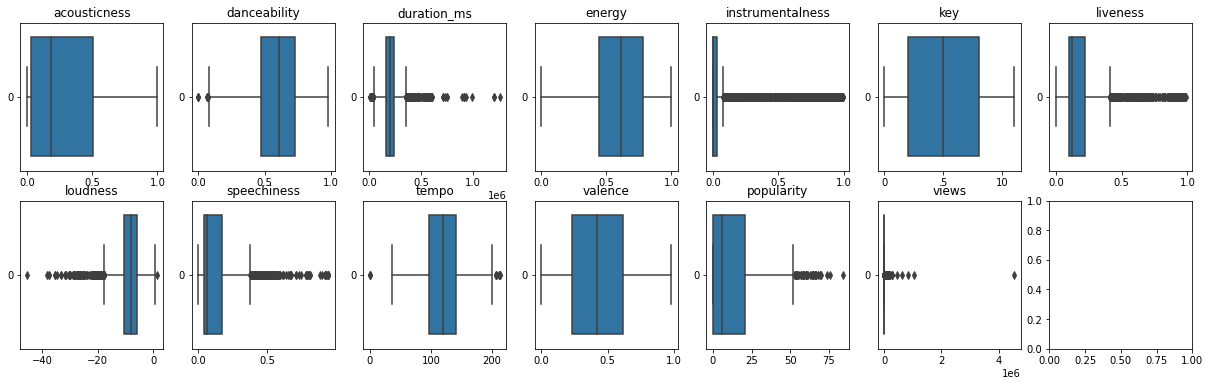

In [72]:
# Tag is a categorical variable while mode is a binary categorical variabel 
temp = negative_eda.copy()
temp = temp.drop(columns = ['mode', 'tag'])

fig, ax = plt.subplots(2, 7, figsize=(21, 6))
for i in range(0, 13):
    ax[i//7, i%7].set_title(temp.columns[i])
    sb.boxplot(temp.iloc[:,i], ax = ax[i//7, i%7], orient = 'h')

## Heatmap <a name = "negative_heatmap"> </a>

C:\Users\tiany\AppData\Local\Temp\ipykernel_32724\2599871180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(negative_eda.corr(), vmin = -1, vmax = 1, linewidths = 1,


<Axes: >

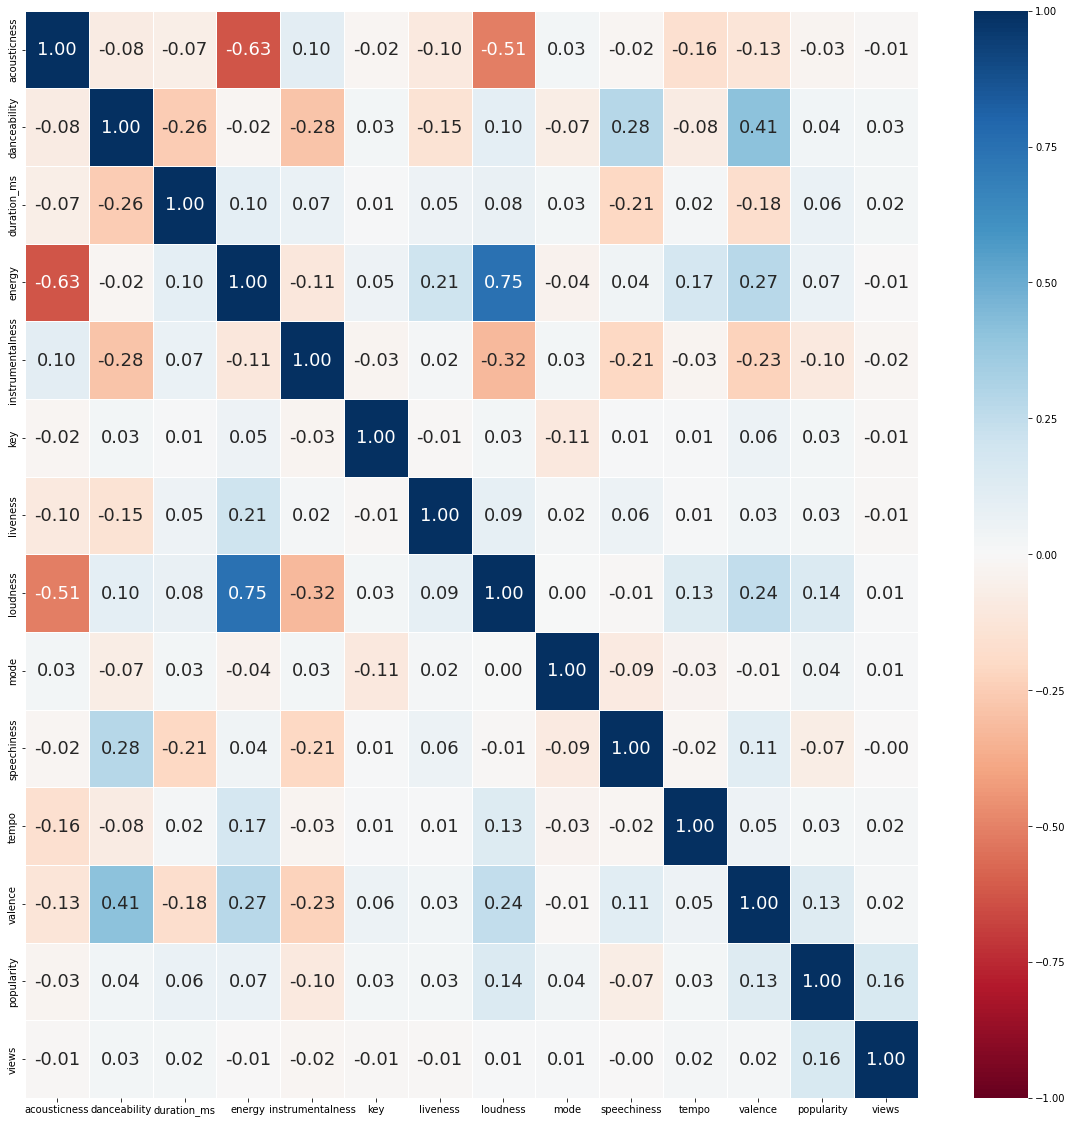

In [171]:
fig = plt.figure(figsize=(20, 20))
sb.heatmap(negative_eda.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Analysis

In respect to correlations of different features to popularity, we could see that most correlation lies between -0.1 to 0.1, which indicate that there's almost no correlation between the respective features and popularity; 


As for correlation between different features, same as that of positive samples', we could see that most inter-feature correlation  lies between -0.05 to 0.05, which indicates that there might not be a linear relationship between features. 
 

# EDA on both positive and negative samples

- [Data and feature analysis](#all_features)
- [Heatmap](#all_heatmap)
- [Analysis of different features](#analysis_all)

## Load positive_and_negative data

In [190]:
df_all_feature = pd.read_csv("positive_and_negative.csv")
df_all_feature.head()

,tag,artist,year,views,features,lyrics,id,url,acousticness,danceability,...,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,url_clean,if_popular
0,pop,AKING,2015,0.000044,{},Glorious mistakes are anxiously waiting to be ...,985583,https://open.spotify.com/track/30sr35axWFPOvmi...,0.760040,0.806517,...,4,0.359676,0.739733,1,0.049686,0.540682,0.570552,0.314607,30sr35axWFPOvmijSfEfdM,False
1,rap,Filip Winther,2020,0.000001,{},[Intro]\nDe-de-deluxe\n\n[Refräng]\nJag fuckar...,5097257,https://open.spotify.com/track/4mznGf6tTvHp74y...,0.020681,0.894094,...,11,0.100000,0.789644,0,0.399371,0.693969,0.501022,0.000000,4mznGf6tTvHp74y0oPOgoD,False
2,pop,Dan Reeder,2018,0.000015,{},The guy who bathes in the pond at the park\nTh...,3407076,https://open.spotify.com/track/1UbSSyqIVEkooKe...,0.993976,0.554990,...,5,0.113475,0.579224,1,0.039099,0.570105,0.640082,0.213483,1UbSSyqIVEkooKeJTz8IgX,False
3,pop,Noa Azazel,2021,0.000001,{},[Pre-Chorus]\nWhen the moon is taking over i'm...,7061926,https://open.spotify.com/track/51F8whLH1Qou7iV...,0.214858,0.419552,...,1,0.113475,0.682223,0,0.061635,0.639886,0.179959,0.011236,51F8whLH1Qou7iVctzkaPF,False
4,rap,070 Phi,2019,0.000020,{},[Chorus]\nAin't no way that you ain't eatin' w...,4241387,https://open.spotify.com/track/0mvzUwvyLT1Dm1y...,0.367469,0.695519,...,0,0.142857,0.771183,0,0.299790,0.376136,0.712679,0.112360,0mvzUwvyLT1Dm1y2L5tniv,False


## Data and feature analysis <a name = "all_features"> </a>

In [178]:
df_all_feature.isnull().sum()

tag                 0
artist              0
year                0
views               0
features            0
lyrics              0
id                  0
url                 0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
popularity          0
url_clean           0
if_popular          0
dtype: int64

In [11]:
all_eda =  pd.DataFrame(df_all_feature[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'valence', 'popularity','views', 'tag']])
all_eda.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,views,tag
0,0.760040,0.806517,0.144170,0.529834,0.000373,4,0.359676,0.739733,1,0.049686,0.540682,0.570552,0.314607,0.000044,pop
1,0.020681,0.894094,0.141797,0.696247,0.000000,11,0.100000,0.789644,0,0.399371,0.693969,0.501022,0.000000,0.000001,rap
2,0.993976,0.554990,0.044422,0.088640,0.207661,5,0.113475,0.579224,1,0.039099,0.570105,0.640082,0.213483,0.000015,pop
3,0.214858,0.419552,0.169140,0.340364,0.000000,1,0.113475,0.682223,0,0.061635,0.639886,0.179959,0.011236,0.000001,pop
4,0.367469,0.695519,0.146753,0.631085,0.000000,0,0.142857,0.771183,0,0.299790,0.376136,0.712679,0.112360,0.000020,rap


In [180]:
all_eda.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,views
count,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000,9534.000000
mean,0.271592,0.635052,0.148956,0.614076,0.085698,5.236207,0.183131,0.806144,0.595343,0.133059,0.563873,0.463051,0.280532,0.007317
std,0.285393,0.176445,0.053206,0.207427,0.237058,3.612339,0.144461,0.081517,0.490851,0.135274,0.136884,0.241224,0.283816,0.024921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034160,0.519348,0.121636,0.480712,0.000000,2.000000,0.099088,0.773619,0.000000,0.041929,0.453018,0.267894,0.000000,0.000003
50%,0.161645,0.654786,0.144255,0.629080,0.000004,5.000000,0.124620,0.822285,1.000000,0.069497,0.555276,0.456033,0.191011,0.000211
75%,0.441766,0.767821,0.169112,0.769428,0.002064,8.000000,0.217832,0.858656,1.000000,0.181342,0.651835,0.646217,0.550562,0.005290
max,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
all_eda.dtypes

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
views               float64
tag                  object
dtype: object

In [9]:
y_all = df_all_feature['if_popular']
y_all

0       False
1       False
2       False
3       False
4       False
        ...  
9529     True
9530     True
9531     True
9532     True
9533     True
Name: if_popular, Length: 9534, dtype: bool

## Heatmap <a name = "all_heatmap"> </a>

C:\Users\tiany\AppData\Local\Temp\ipykernel_32724\1597943713.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(all_eda.corr(), vmin = -1, vmax = 1, linewidths = 1,


<Axes: >

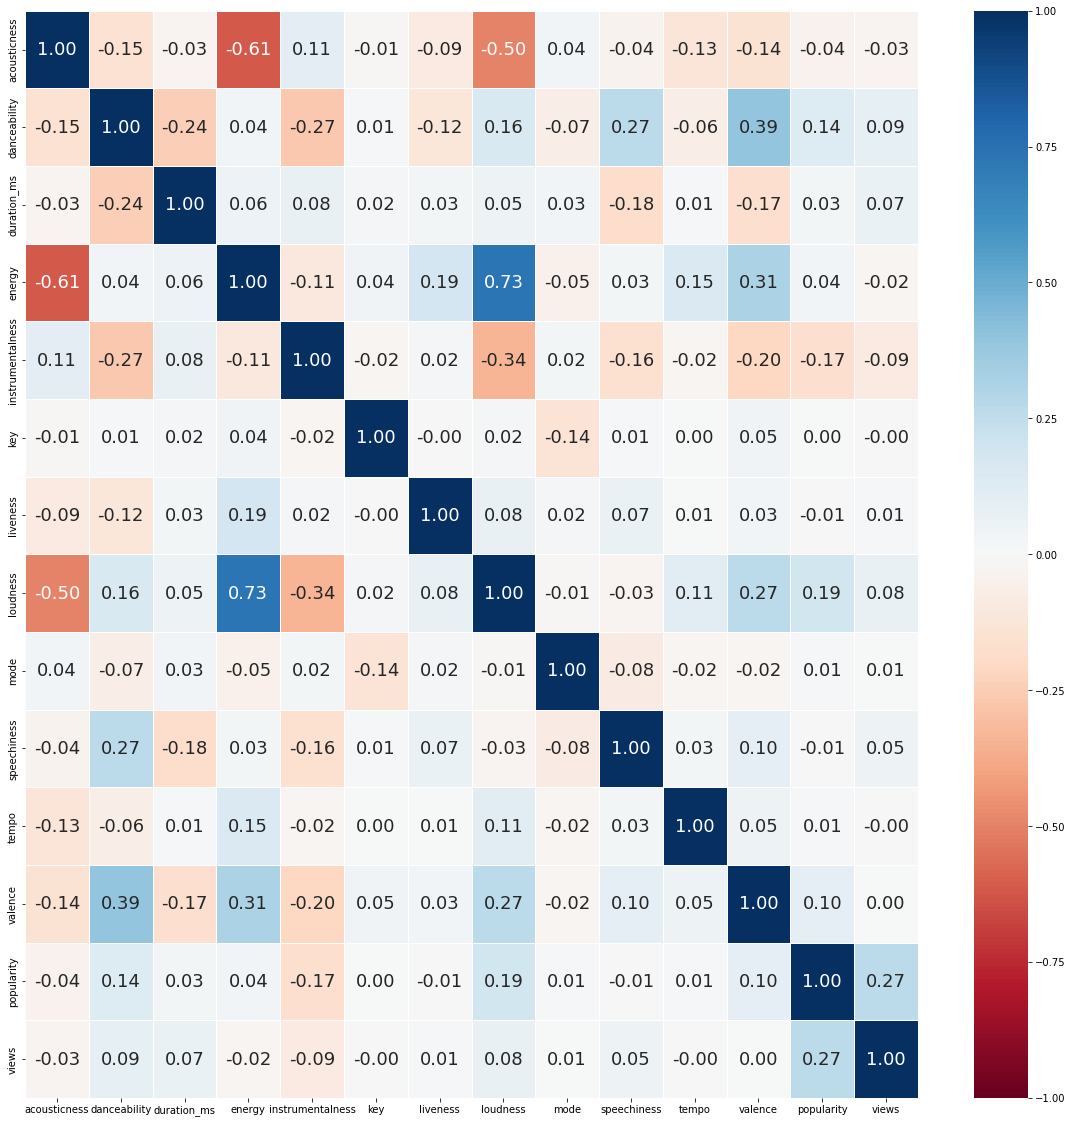

In [182]:
fig = plt.figure(figsize=(20, 20))
sb.heatmap(all_eda.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Analysis

## Analysis of different features <a name = "analysis_all"> </a>

- [acousticness](#acousticness)
- [danceability](#danceability)
- [duration_ms](#duration)
- [energy](#energy)
- [instrumentalness](#instrumentalness)
- [key](#key)
- [liveness](#liveness)
- [loudness](#loudness)
- [mode](#mode)
- [speechiness](#speechiness)
- [tempo](#tempo)
- [valence](#valence)
- [views](#views)
- [tag](#tag)
- [lyrics](#lyrics)

### Acousticness: the level of confidence on the track is acoustic. <a name = "acousticness"> </a>

mean of positive: 0.2452
mean of negative: 0.2958


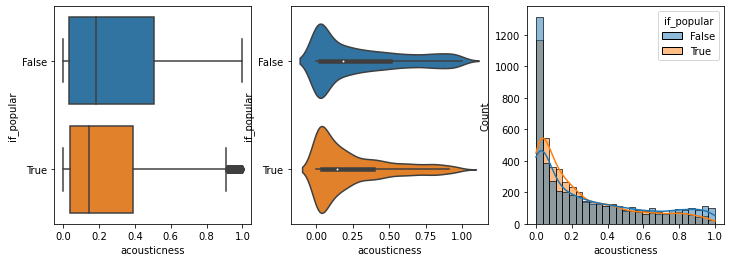

In [191]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,0], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,0], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,0], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,0]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,0]):.4f}')

---
Songs with **higher acousticness** will consist **mostly of natural acoustic sound**, such as those pure instrumental or human vocal audio; While songs with a **low acousticness** will consist of **mostly electric sounds**. 

The mean value of positive sample (0.2452) is relative lower than that of negative sample (0.2958), with a slight difference, while both are relatively low. 

From boxplot, we could see the range of data points in the upper quatile of negative samples is relatively broader. Also, the median of negative sample is higher than that of the positive. 

From the histplot, both taller bar are the ones that are closer to zero, with similar kde.

Overall, both the distribution of positive and negative data show a decreasing trend as the level of acousticness increase, with a more rapid decrease as the value is smaller. 

These means that most popular and unpopular song have a lower level of acousticness, indicating that most congs are more electric-ish, while **popular songs** might consist of **more electric sounds**.

---

### Danceability: How suitable a track is for dancing <a name = "danceability"> </a>

mean of positive: 0.6556
mean of negative: 0.5916


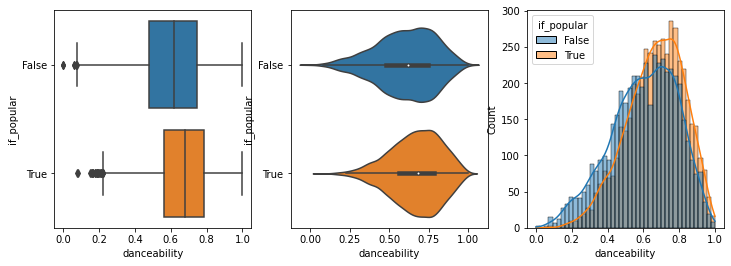

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,1], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,1], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,1], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,1]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,1]):.4f}')

---
Danceability is measured with a combination of **musical elements** including **tempo, rhythm stability, beat strength, and overall regularity**. The higher the danceability value, the **better the song is for dancing**.

The mean value of positive (0.656) sample is relative higher than that of the negative sample is (0.592), while both are relatively good songs for dancing.

From the boxplot, we could see that the the range and quatiles of negative samples are lower thatn that of the positive samples.

From the violin plot, we could see that more positive samples are more centered around 0.7 than negative samples.

From the histplot, by looking into the kde plot, there are more positive sapmles with relatively high danceability value ranging from 0.6 to 0.9 when compared to negative samples

Overall, **more popular songs have higher danceability values**, which make them more suitable for dancing compared to less popular songs. This may contribute to their popularity, as songs that are good for dancing are played more often at various events, **increasing their exposure** and popularity.

---

### Duration_ms: The duration of the track in milliseconds <a name = "duration"> </a>

mean of positive: 209029.5328
mean of negative: 204802.1458


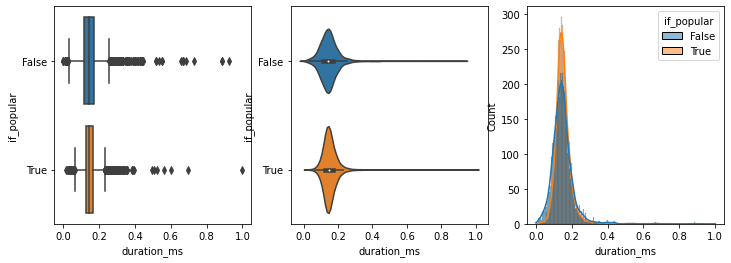

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,2], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,2], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,2], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,2]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,2]):.4f}')

---
Duration_ms measures the duration of track.

From the boxplot, we could see a narrower box for positive samples than the negative samples. While negative samples have a more widespead distrubution of outliers ranging from 0.4-0.5.

From the violin plot and histplot, the kde plot shows that the duration_ms of positive songs are more close to 175000 miliseconds (2.9 minutes) than the negative samples. 

Most songs' duration are around 3 minutes, while **more popular songs** have a duration of **around 3 minutes**. 

---

### Energy: perceptual measure of intensity and activity <a name = "energy"> </a>

mean of positive: 0.6283
mean of negative: 0.5997


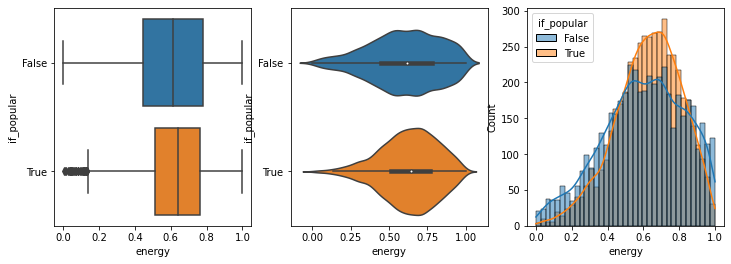

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,3], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,3], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,3], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,3]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,3]):.4f}')

--- 
Perceptual features such as **dynamic range, perceived loudness, timbre, onset rate and general entropy** will contribute to the energy feature. Tracks that are **high in energy** are mostly the one that are **fast, loud and noisy**, an extreme example of this might be death metal song. 

The mean of energy of positive sample (0.6283) is slightly higher than that of the negative sample (0.5997), while both are above-average score. 

From the boxplot, we could see that the lower quatile and median of energy values of negative samples are  lower than that of the positives. 

As for violin plot and histplot, there's no significant difference between the two types of samples 

Overall, while negative samples might have a relatively lower enrgy value than positive sample, there's **no significance difference**.

---

### Instrumentalness: whether a track contains no vocals. <a name = "instrumentalness"> </a>

mean of positive: 0.0279
mean of negative: 0.1421


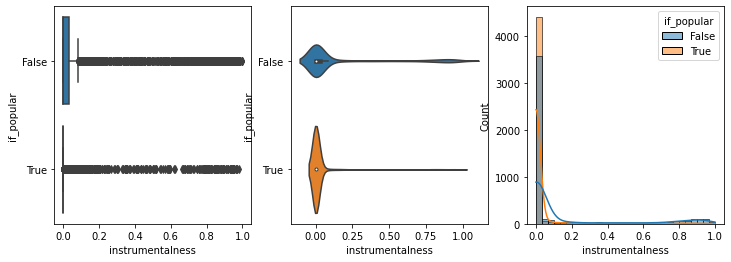

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,4], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,4], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,4], ax = axes[2], kde = True, bins = 30, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,4]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,4]):.4f}')

---

1.0 instrumentalness indicates the highest likelihood the track contains no vocal content, purely instrumental; Values above 0.5 are intended to represent instrumental track. 

The mean value of positive sample (0.0279) is slightly lower than that of the negative samples (0.1421). 

From the boxplot, we could see that box of the negative sample is located more left than that of the positive one, indicating that more values has a higher instrumentalness. 

From the negative samples' violin plot, we could see values accumulating around 0.9, and there're some ranging from 0.0 to 0.2. While almost all data points for positive dataset are lower than 0.1. 

For histplot, we could observe a very tall bar locate at 0 for both positive and negative dataset, indicating that there's around 3500 songs that contains a lot of human vocal content. 

Overall, **negative songs have a higher distribution of songs with a higher instrumentalness**.

---

### Key: the key that the track is in <a name = "key"> </a>
aka chords of a song

In [111]:
all_eda['key'].unique()

array([ 4, 11,  5,  1,  0,  6,  7,  2,  9,  8, 10,  3], dtype=int64)

**There are 12 unique keys as seen above.**

In Western music, there are a total of 12 keys - 

C Major, C Minor, C# Major, C# Minor, 

D Major, D Minor, D# Major, D# Minor, 

E Major, E Minor, 

F Major, F Minor, F# Major, F# Minor, 

G Major, G Minor, G# Major, G# Minor, 

A Major, A Minor, A# Major, A# Minor,

B Major, B Minor. 

Each key has its own unique characteristics and can evoke different emotions in listeners.

mean of positive: 5.2226
mean of negative: 5.2498


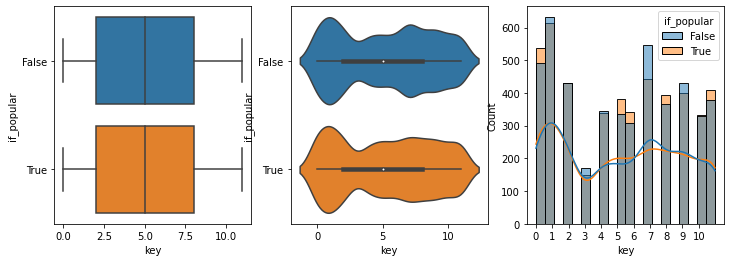

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,5], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,5], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,5], ax = axes[2], kde = True, hue = y_all)
axes[2].set_xticks(range(0,11))

print(f'mean of positive: {mean(positive_eda.iloc[:,5]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,5]):.4f}')

---
Integers ap to pitches using standard pitch class notation from [pitch class](https://en.wikipedia.org/wiki/Pitch_class)

E.g. 0 = C, 1 = C♯, 2 = D, and so on. If no key was detected, the value is -1. 

The key in both datasets looks similarly distributed in the boxplot and violinplot.

From the histplot, **popular** songs have a  **wider range** of keys compared to non popular songs as seen in the blue bar which means non popular songs. There is a huge number of key 7.

---

### Liveness: presence of an audience in the recording <a name = "liveness"> </a>

mean of positive: 0.1754
mean of negative: 0.1861


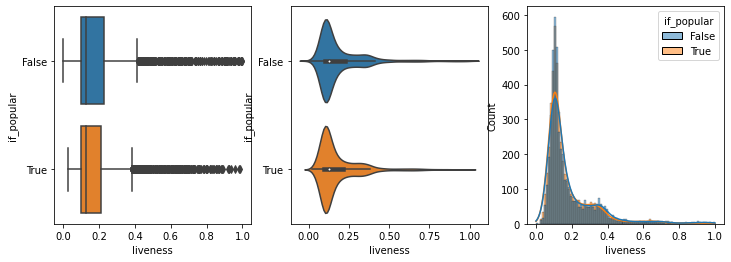

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,6], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,6], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,6], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,6]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,6]):.4f}')

---
Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. 

For popular and non popular songs, it seems like liveness does not affect much as there is not much difference acorss the 3 plots.

This may be due to the fact that people are not concerned whether the song is recorded live as long as the song  quality is  the same as the recorded ones.

---

### Loudness: overall loudness of a track in decibels (dB) <a name = "loudness"> </a>

mean of positive: -6.7786
mean of negative: -8.8602


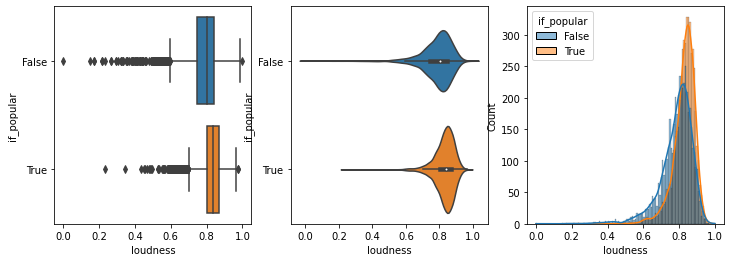

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,7], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,7], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,7], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,7]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,7]):.4f}')

---
Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlation of physical strength (amplitude). Values typically range between -60 and 0 db. 

The mean of negative (-6.78) sample is lower than the mean of positive(-8.86). 

There is no significant difference between the 2 as seen in the boxplot and violinplot. Though the outlier for non popular songs have a wider  range as  compared to songs that are popular.

As for the histplot, it showed that **popular songs had higher frequency in loudness as compared to non popular songs.

---

### Mode <a name = "mode"> </a>
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

mean of positive: 5.2226
mean of negative: 5.2498


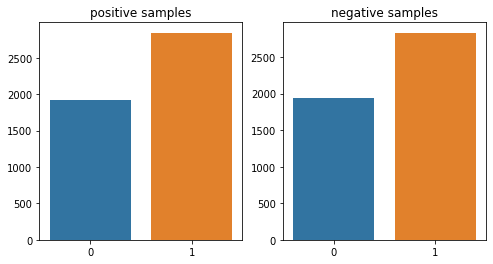

In [137]:
fig, axes = plt.subplots(1, 2, figsize = (8, 4))
positive_count = positive_eda.iloc[:,8].value_counts()
negative_count = negative_eda.iloc[:,8].value_counts()
sb.barplot(x=positive_count.index, y=positive_count.values, ax = axes[0])
sb.barplot(x=negative_count.index, y=negative_count.values, ax = axes[1])
axes[0].set_title('positive samples', fontsize = 12)
axes[1].set_title('negative samples')
print(f'mean of positive: {mean(positive_eda.iloc[:,5]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,5]):.4f}')

Based on the barplot, the mode for both positive and negative samples have the same distribution and **does not have any significant difference**. 

### Speechiness: the presence of spoken words in track <a name = "speechiness"> </a>

mean of positive: 0.5964
mean of negative: 0.5943


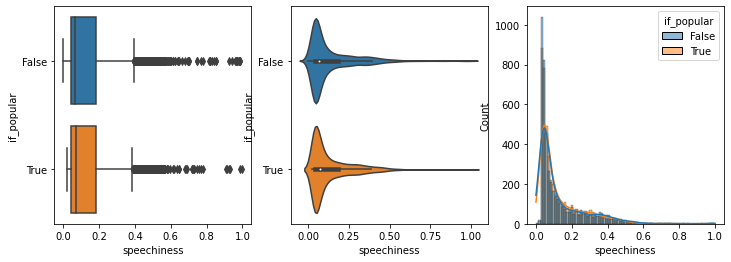

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,9], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,9], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,9], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,8]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,8]):.4f}')

---

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


There is **not much difference** between the 2 datasets as all graphs showed how similar their distributions are. Even their skewness and mean are similar.

---

### Tempo <a name = "tempo"> </a>

mean of positive: 0.1254
mean of negative: 0.1284


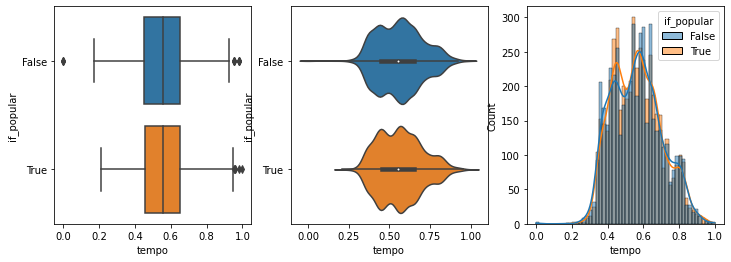

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,10], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,10], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,10], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,9]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,9]):.4f}')

---
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

The mean between the 2 datasets are very close and does not tell us much about their difference. 

Although there is some outlier at the left side of the boxplot with negative sample, it does not have a significant impact on the popularity of a song as the boxplot and violinplot are similar between the 2 dataaets.

The histplot have some difference whereby the positive dataset have a **wider range** of tempo but overall, the kde between the 2 datasets are similar to each other.

---

### Valence: the musical positiveness conveyed by a track <a name = "valence"> </a>

mean of positive: 0.1254
mean of negative: 0.1284


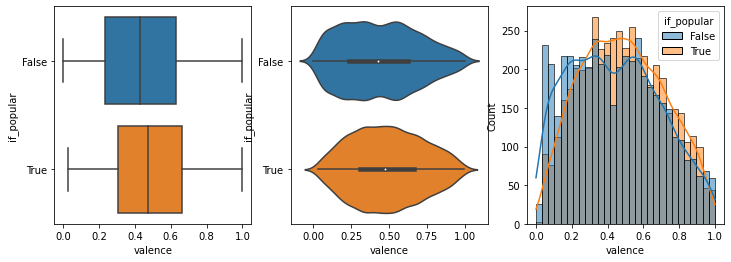

In [174]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,11], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,11], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,11], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,9]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,9]):.4f}')

Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

From the boxplots, we could see that the quantiles of positive are slightly higher than that of the negative samples.

From the histplot, we could observe that the kde of positive samples is slightly located towards the left than negative sample, which mean that more positive songs has higher valance values.

This suggests that a greater proportion of positive samples have higher valence values, which in turn indicates that **songs with a positive sentiment** tend to be **more popular**.

### Popularity <a name = "popularity"> </a>

mean of positive: 0.1254
mean of negative: 0.1284


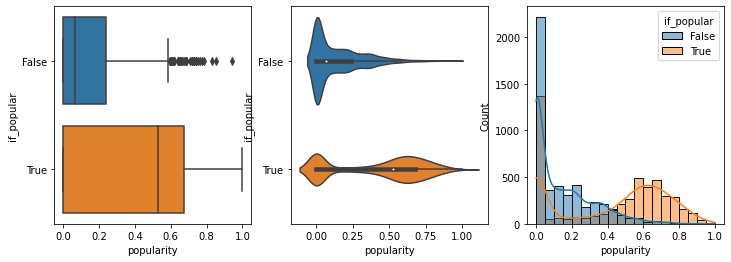

In [176]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.boxplot(x = all_eda.iloc[:,12], y = y_all, ax = axes[0], orient = 'h',)
sb.violinplot(x = all_eda.iloc[:,12], y = y_all, ax = axes[1], orient = 'h')
sb.histplot(x = all_eda.iloc[:,12], ax = axes[2], kde = True, hue = y_all)
print(f'mean of positive: {mean(positive_eda.iloc[:,9]):.4f}')
print(f'mean of negative: {mean(negative_eda.iloc[:,9]):.4f}')

From the boxplot, we could see that the popularity of positive sample is significantly higher than that of the negative sample, the same could be shown in the violin plot. 

From the histplot, we could observe a very tall at 0 for negative data. Besides, the kde of of positive samples is left-skewed while that of the negative sample is right-skewed. 
This finding could be explained as positive samples consists of **popular songs** which should have **higher values of popularity**, vice versa for negative samples. 

### Tag: the genre of the muusic and may be used as a feature. <a name = "tag"> </a>


<Axes: title={'center': 'Negative'}>

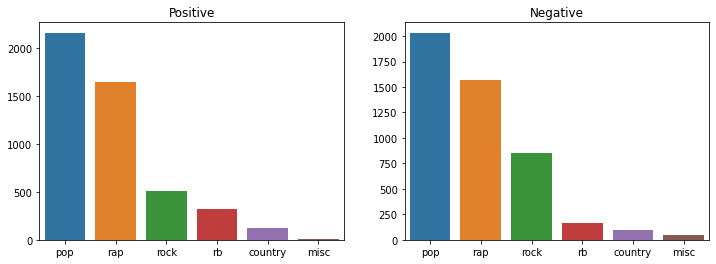

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('Positive')
ax[1].set_title('Negative')
positive_count = positive_eda['tag'].value_counts()
negative_count = negative_eda['tag'].value_counts()
sb.barplot(x=positive_count.index, y=positive_count.values, ax = ax[0])
sb.barplot(x=negative_count.index, y=negative_count.values, ax = ax[1])

In the countplot above, we see that negative have more rock than positive dataset. There are more misc in negative than positive although not much. Misc does not cause a significant difference as misc is a mixture of other genre that are not easily classified into the genre that we have currently. Therefore, this does not affect much as people generally listen to pop or rap music.

### Lyrics: common words <a name = "lyrics"> </a>
Exploring lyrics as a important feature of a song

In [92]:
from wordcloud import WordCloud,STOPWORDS
def cloud(data):
    comment_words = '' 
    # iterate through the csv file
    for val in data.lyrics:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "
    return comment_words


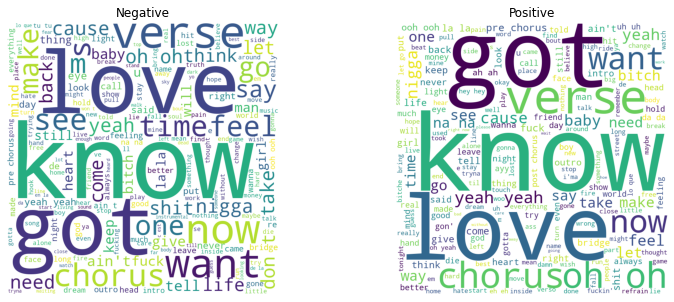

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

wordcloud_negative = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(cloud(df_negative_feature))

wordcloud_positive = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = set(STOPWORDS),
            min_font_size = 10).generate(cloud(df_positive_feature))

ax[0].set_title('Negative')
ax[0].imshow(wordcloud_negative)
ax[0].axis("off")
ax[1].set_title('Positive')
ax[1].imshow(wordcloud_positive)
ax[1].axis("off")
plt.tight_layout(pad = 0)

Using wordcloud, we visualise words with high occurance in the corpus. From the graph above, we could see that some words such as 'know' is common among both positive and negative sample. To further explore the importance of lyrics, we will utilze different feature extraction method and visulise lyrics with word vector in the next notebook.

Reference: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

## Normalizing features <a name = "normalize"> </a>

After looking into different features, we found out that some data are quite **skewed distributed**. On the other hand, some have value between 0 and 1, while some have value ranging till a few thousand. Hence, to facilitate our work in the later stage, we would created a copy of our features data that's being normalized.

In [189]:
normalizing_cols = ['views','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','popularity']
for col in normalizing_cols:
    df_all_feature[col] = (df_all_feature[col]-df_all_feature[col].min())/(df_all_feature[col].max()-df_all_feature[col].min())
df_all_feature.head()

,artist,year,views,features,lyrics,id,url,acousticness,danceability,duration_ms,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,AKING,2015,0.000044,{},Glorious mistakes are anxiously waiting to be ...,985583,https://open.spotify.com/track/30sr35axWFPOvmi...,0.760040,0.806517,0.144170,...,0,0,1,0,0,0,0,0,0,0
1,Filip Winther,2020,0.000001,{},[Intro]\nDe-de-deluxe\n\n[Refräng]\nJag fuckar...,5097257,https://open.spotify.com/track/4mznGf6tTvHp74y...,0.020681,0.894094,0.141797,...,0,0,0,0,0,0,0,0,0,1
2,Dan Reeder,2018,0.000015,{},The guy who bathes in the pond at the park\nTh...,3407076,https://open.spotify.com/track/1UbSSyqIVEkooKe...,0.993976,0.554990,0.044422,...,0,0,0,1,0,0,0,0,0,0
3,Noa Azazel,2021,0.000001,{},[Pre-Chorus]\nWhen the moon is taking over i'm...,7061926,https://open.spotify.com/track/51F8whLH1Qou7iV...,0.214858,0.419552,0.169140,...,0,0,0,0,0,0,0,0,0,0
4,070 Phi,2019,0.000020,{},[Chorus]\nAin't no way that you ain't eatin' w...,4241387,https://open.spotify.com/track/0mvzUwvyLT1Dm1y...,0.367469,0.695519,0.146753,...,0,0,0,0,0,0,0,0,0,0


On the other hand, we also noticed that although some features have numeric value, they are some **categorical variable**, such as key. 
Hence, we deicded to perform transfer these categorical variable to one hot vector for better data handling in the later stage.

In [191]:
one_hot_key = pd.get_dummies(df_all_feature['key'], prefix='key')
df_all_feature = df_all_feature.drop(columns=['key'])
df_all_feature = df_all_feature.join(one_hot_key)
one_hot_tag = pd.get_dummies(df_all_feature['tag'], prefix='tag')
df_all_feature = df_all_feature.drop(columns=['tag'])
df_all_feature = df_all_feature.join(one_hot_tag)
df_all_feature

,artist,year,views,features,lyrics,id,url,acousticness,danceability,duration_ms,...,key_8,key_9,key_10,key_11,tag_country,tag_misc,tag_pop,tag_rap,tag_rb,tag_rock
0,AKING,2015,4.432273e-05,{},Glorious mistakes are anxiously waiting to be ...,985583,https://open.spotify.com/track/30sr35axWFPOvmi...,0.760040,0.806517,0.144170,...,0,0,0,0,0,0,1,0,0,0
1,Filip Winther,2020,1.251733e-06,{},[Intro]\nDe-de-deluxe\n\n[Refräng]\nJag fuckar...,5097257,https://open.spotify.com/track/4mznGf6tTvHp74y...,0.020681,0.894094,0.141797,...,0,0,0,1,0,0,0,1,0,0
2,Dan Reeder,2018,1.513459e-05,{},The guy who bathes in the pond at the park\nTh...,3407076,https://open.spotify.com/track/1UbSSyqIVEkooKe...,0.993976,0.554990,0.044422,...,0,0,0,0,0,0,1,0,0,0
3,Noa Azazel,2021,1.251733e-06,{},[Pre-Chorus]\nWhen the moon is taking over i'm...,7061926,https://open.spotify.com/track/51F8whLH1Qou7iV...,0.214858,0.419552,0.169140,...,0,0,0,0,0,0,1,0,0,0
4,070 Phi,2019,2.031221e-05,{},[Chorus]\nAin't no way that you ain't eatin' w...,4241387,https://open.spotify.com/track/0mvzUwvyLT1Dm1y...,0.367469,0.695519,0.146753,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,mounika yadav,2021,1.257423e-05,"{""Allu Arjun"",""Rashmika Mandanna""}",నువ్ అమ్మీ అమ్మీ అంటాంటే నీ పెళ్ళాన్నైపోయినట్ట...,7552375,https://open.spotify.com/track/4ZUxhQNRCzlh6al...,0.360441,0.821792,0.161581,...,0,0,0,0,0,0,1,0,0,0
9530,d-metal stars,2016,1.706909e-07,{},[Verse 1]\nThe seaweed is always greener\nIn s...,7558599,https://open.spotify.com/track/0F8nLktPi0SgOAm...,0.000092,0.542770,0.154411,...,1,0,0,0,0,0,0,0,0,1
9531,grupo firme,2021,2.048290e-06,{Maluma},"Dejen de meterse ya, en donde no les importa\n...",7728445,https://open.spotify.com/track/5BE9B2FiFWBbBdo...,0.137549,0.719959,0.142190,...,0,0,0,0,0,0,1,0,0,0
9532,hensonn,2021,7.567295e-06,{},[Instrumental],7814578,https://open.spotify.com/track/6nqdgUTiWt4JbAB...,0.146585,0.626273,0.122640,...,0,0,0,0,0,0,0,1,0,0


In [192]:
#df_all_feature.to_csv("positive_and_negative_one_hot", index = False)